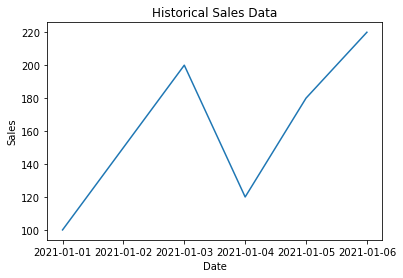

Mean Absolute Error: 19.0
Future Predictions: [162. 174. 186. 198. 210. 222. 234. 246. 258. 270. 282. 294. 306. 318.
 330. 342. 354. 366. 378. 390. 402. 414. 426. 438. 450. 462. 474. 486.
 138. 150. 162. 174. 186. 198. 210. 222. 234. 246. 258. 270. 282. 294.
 306. 318. 330. 342. 354. 366. 378. 390. 402. 414. 426. 438. 450. 462.
 474. 486. 498. 138. 150. 162. 174. 186. 198. 210. 222. 234. 246. 258.
 270. 282. 294. 306. 318. 330. 342. 354. 366. 378. 390. 402. 414. 426.
 438. 450. 462. 474. 486. 498. 138. 150. 162. 174. 186. 198. 210. 222.
 234. 246. 258. 270. 282. 294. 306. 318. 330. 342. 354. 366. 378. 390.
 402. 414. 426. 438. 450. 462. 474. 486. 138. 150. 162. 174. 186. 198.
 210. 222. 234. 246. 258. 270. 282. 294. 306. 318. 330. 342. 354. 366.
 378. 390. 402. 414. 426. 438. 450. 462. 474. 486. 498. 138. 150. 162.
 174. 186. 198. 210. 222. 234. 246. 258. 270. 282. 294. 306. 318. 330.
 342. 354. 366. 378. 390. 402. 414. 426. 438. 450. 462. 474. 486. 138.
 150. 162. 174. 186. 198. 210. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer


class DemandForecasting:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.preprocessed_data = None
        self.data_with_features = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.y_pred = None
        self.future_predictions = None

    def load_data(self):
        self.data = pd.read_csv(self.data_file)
        self.data['date'] = pd.to_datetime(self.data['date'])

    def preprocess_data(self):
        self.data.set_index('date', inplace=True)
        self.preprocessed_data = self.data.copy()

    def visualize_data(self):
        plt.plot(self.preprocessed_data.index, self.preprocessed_data['sales'])
        plt.title('Historical Sales Data')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.show()

    def feature_engineering(self):
        self.data_with_features = self.preprocessed_data.copy()
        self.data_with_features['year'] = self.data_with_features.index.year
        self.data_with_features['month'] = self.data_with_features.index.month
        self.data_with_features['day'] = self.data_with_features.index.day

    def perform_train_test_split(self):
        X = self.data_with_features[['year', 'month', 'day']]
        y = self.data_with_features['sales']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_model(self):
        self.model = TransformedTargetRegressor(regressor=LinearRegression())
        self.model.fit(self.X_train, self.y_train)

    def make_predictions(self):
        self.y_pred = self.model.predict(self.X_test)

    def evaluate_model(self):
        mae = mean_absolute_error(self.y_test, self.y_pred)
        print('Mean Absolute Error:', mae)

    def make_future_predictions(self):
        future_dates = pd.date_range(start='2023-06-03', end='2023-12-31', freq='D')
        future_data = pd.DataFrame(index=future_dates, columns=['year', 'month', 'day'])
        future_data['year'] = future_data.index.year
        future_data['month'] = future_data.index.month
        future_data['day'] = future_data.index.day
        self.future_predictions = self.model.predict(future_data)

    def run_demand_forecasting(self):
        self.load_data()
        self.preprocess_data()
        self.visualize_data()
        self.feature_engineering()
        self.perform_train_test_split()
        self.train_model()
        self.make_predictions()
        self.evaluate_model()
        self.make_future_predictions()


# Create an instance of the DemandForecasting class
demand_forecaster = DemandForecasting('sales_data.csv')

# Run the demand forecasting pipeline
demand_forecaster.run_demand_forecasting()

# Access the future predictions
future_predictions = demand_forecaster.future_predictions
print('Future Predictions:', future_predictions)
